# DTEK0042 Exercise 3
    Group Members:
    1. Emilia Kalliokoski
    2. Amanda Myntti
    3. Lauri Orava

*** Note for Google Colab Users ***
     Because Google Colab doesn't have a button to convert your notebook to .html format here is a quick work around:
   1. open a new google colab notebook
   2. in the files section in google colab, upload the .ipynb file you want to be converted to .html
   3. in your new open notebook run this command in an empty cell: !jupyter nbconvert --to html YourFileName.ipynb
   4. after the command is finished running refresh the page
   5. In your files section you should see your original .ipynb file that you uploaded and then a .html file of that same notebook.
   6. download the .html file and you're good to go!

In this exercise, you are required to analyze a PPG signal step-by-step as outlined below.  The deliverables for this exercise are a jupyter notebook and a .html file exported form the notebook. The notebook should includes your code, observations, graphs, and conclusions made upon analyzing the given PPG signal. Please provide caption and description for every figure. 

## 1- library Imports

In [ ]:
import scipy
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

# 2- Data Import and plotting
* Import the PPG signal data “PPG_record.txt” into your python environment and store it in a variable named “PPG_data”.
* The first column contains timestamp of samples, the second one contains red, the third one contains infrared (IR), and the last column contains green sensor data. 
* Take IR signal and store it in a variable called “PPG_sig”.  
* Note: the sampling frequency of this signal is 132 Hz. 
* Plot the IR signal stored in "PPG_sig" VS Time in seconds
* When plotting the data "PPG_sig" vs time in seconds, use the function np.linspace to make a seconds array using the length of "PPG_sig" and the sampling frequency of 132 Hz. Do not use the timestamp column of the data.

     HINT: 
         PPG_data = np.loadtxt(the directory of the PPG Data) 
         
         or
         
         PPG_data = pd.read_csv(the directory of the PPG Data, names = [name for each column])
         * Note: If you are using pandas to load into data, we'd recommend you convert pandas series data to numpy type for further analysis

In [ ]:

# Select the datafile
from google.colab import files
uploaded = files.upload()



Saving PPG_record.txt to PPG_record.txt


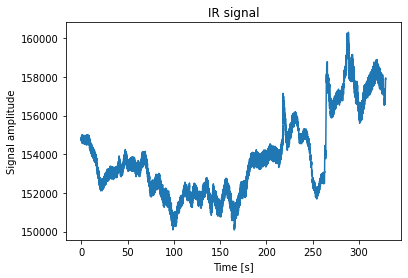

In [ ]:
# read the data
PPG_data = np.loadtxt('PPG_record.txt', delimiter=",") 

# select timestamps and IR signal
timestamps = PPG_data[:,0]
PPG_sig = PPG_data[:, 2]

# plot the IR signal vs. 132 Hz x-axis
x = np.arange(0, len(PPG_sig) * 1.0/132, 1.0/132 )
plt.plot(x, PPG_sig)
plt.title("IR signal")
plt.xlabel("Time [s]")
plt.ylabel("Signal amplitude")
plt.show()


The measurement is 300 seconds long, so this is a short term measurement.

# 3- Compute power spectral density (PSD)

 * Compute power spectral density (PSD) using the Welch method provided by scipy package.  Select only the frequencies between 0.7 and 3Hz since the human heart rate typically does not go beyond these limits. 
 * Plot the limited PSD versus frequency
 * Find the dominant PSD value and its corresponding frequency. 
 * Store the value of the found frequency component in a variable named “dominant_freq”. 
 * Reference:
 https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html#scipy.signal.welch
 
      
      HINT: 
        PSD_freqs , PSD = scipy.signal.welch() 
        Set the nperseg parameter to be = 10*Fs
        

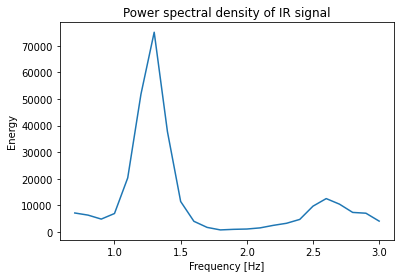

In [ ]:
# get frequencies and values of PSD in arrays
PSD_freqs , PSD = signal.welch(PPG_sig, fs=132, nperseg = 10*132) 


# drop the unwanted values
fx_new = []
fy_new = []
for i in range(len(PSD_freqs)):
  if PSD_freqs[i] < 0.7 or PSD_freqs[i] > 3:
    continue
  fx_new.append(PSD_freqs[i])
  fy_new.append(PSD[i])

# plot
plt.plot(fx_new, fy_new)
plt.title("Power spectral density of IR signal")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Energy")
plt.show()

Dominant frequency is the frequency[argmax(PSD)]

In [ ]:
dominant_freq = fx_new[fy_new.index(max(fy_new))]
print(dominant_freq)

1.3


# 4- Band Pass Filter Design and Filtering of PPG signal
*  Design a band pass filter. Use Butterworth filter of order 4 with cutoff frequencies equal to (dominant_freq – 0.3) and (dominant_freq + 0.3).

* Filter the original PPG signal with the designed filter. 

* Plot the filtered PPG signal showing heartbeats in the form of a sinusoid


* Note: the documentation of scipy package online is very comprehensive and informative. there are examples that 
  you can easily follow and use to solve the given exercise here. 
  https://docs.scipy.org/doc/scipy-0.14.0/reference/signal.html    
    
   
      HINT: 
        from scipy.signal import butter, filtfilt, freqz
    

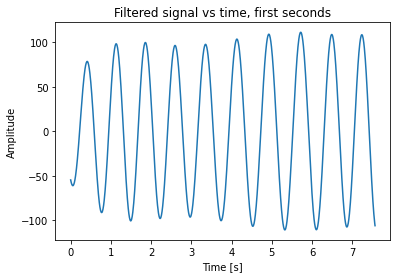

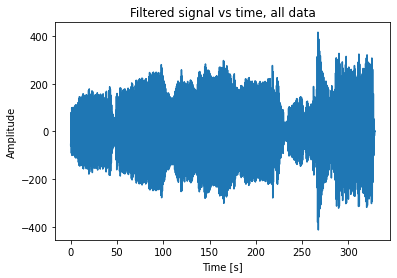

In [ ]:

from scipy.signal import freqz, butter, filtfilt

# use butter as in the second exercise
sampling_rate = 0.5*132
b, a = butter(4, [(dominant_freq-0.3)/sampling_rate,(dominant_freq+0.3)/sampling_rate], btype='band')
y = filtfilt(b, a, PPG_sig)

# plot them
plt.plot(x[:1000],y[:1000])
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Filtered signal vs time, first seconds")
plt.show()
plt.close()

plt.plot(x,y)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Filtered signal vs time, all data")
plt.show()
plt.close()


## Observations:
Heart beats are displayed as sinusoid, this is clear from the first graph. We can approximate the heart beat to be a bit lower than 90/min, since there is slightly less than 3 beats per 2 seconds. The amplitude changes drastically, which can be caused by increased/decreased blood flow near the sensor or contact disturbanses.  


# 5- Find the maximum extrema points (or peaks) of the signal
* The distance between every two consecutive peak location correlates with the RR interval.
* Find the peaks of the filtered signal in the time domain.
* Calculate these peak-to-peak intervals, store it in a variable named “RR_intervals” and report the average value of these intervals. 
* Convert the computed average value to heart rate as shown below and report it
* You can use “argrelextrema” function in scipy package for peak detection
* Plot Filtered PPG With peak locations
* Describe your observations below
* Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.argrelextrema.html

      HINT:
        from scipy.signal import argrelextrema
        HeartRate = 60.0/avg_peak_intervals 

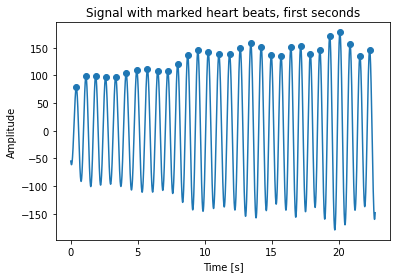

Average heart rate:  78.44843111449747


In [ ]:

from scipy.signal import argrelextrema


# calculate peaks, np.greater is a relation that is used to 
# deduce which is a peak and which is not
peaks=argrelextrema(y, np.greater)

# plotting, we focus again on the first values for easy-to-interpret graphs
plt.plot(x[:3000],y[:3000])
plt.scatter(x[peaks][:30], y[peaks][:30])
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Signal with marked heart beats, first seconds")
plt.show()

# calculate the RR intervals
RR_intervals = [peaks[0][i+1]- peaks[0][i] for i in range(len(peaks[0])-1)]

# calculate the average peak distance in 1/132 seconds
avg_peak_intervals = np.mean(RR_intervals)

# calculate heart rate from this
HeartRate = 60.0/avg_peak_intervals*132
print("Average heart rate: ",HeartRate)

## Observations: 

The scipy argrelextrema works nicely and places the beats to correct positions. The average heart beat over this measurement is 78/minute, which is reasonable for a person at rest or mildly stressed/stimulated.

# 6- Calculate SDNN and RMSSD
* AVNN is average of the time interval between successive normal heart beats. 
* SDNN is standard deviation of the time interval between successive normal heart beats (i.e. the RR-intervals).
* RMSSD is the Root mean square of successive RR interval differences.

* Calculate AVNN, SDNN and RMSSD from the “RR_intervals” variable. 
* These are heart rate variability parameters. Report the AVNN, SDNN and RMSSD values. 
* RMSSD formula can be found in https://www.biopac.com/application/ecg-cardiology/advanced-feature/rmssd-for-hrv-analysis/

* Note: Time unit for intervals should be in millisecond.
   
   HINT:
        Use np.diff(RR_intervals) to calculate the difference between successive rr intervals
        Use np.std() for SDNN
        
Formula for root mean square:

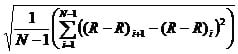

In [ ]:
# function for root mean square

def calc_RMSSD(RR):
  N = len(RR) # number of measure points
  # difference of two intervals squared
  RR_dif_squared = [(RR[i]-RR[i-1])**2 for i in range(1,len(RR))]
  # sum them
  sum = np.sum(RR_dif_squared)
  # return sqrt of sum and 1/N-1
  return np.sqrt((1.0/(N-1))*sum)

# change to milliseconds
RR_intervals_in_ms = np.array(RR_intervals)/132.0*1000

# calculate the values
AVNN = np.mean(RR_intervals_in_ms)
SDNN = np.std(RR_intervals_in_ms)
RMSSD = calc_RMSSD(RR_intervals_in_ms)

print("AVNN: ", AVNN)
print("SDNN: ", SDNN)
print("RMSSD: ", RMSSD)



AVNN:  764.8336511972875
SDNN:  64.5847850202828
RMSSD:  34.355388688050155


## Observations:

We base our analysis of SDNN and RMSSD on a table found [here](https://www.sciencedirect.com/science/article/pii/S0735109797005548#TBL1).

AVNN corresponds to heart rate, as it should (HR = 60000/AVNN). This is a regular average pulse as we stated before. 

SDNN is low for a regular person, it should be about 120-150. We do not know what could cause this.

RMSSD is normal for an adult person, generally it is in range 40-25.